In [1]:
import sys
sys.path.append("..")

import matplotlib.pyplot as plt
from scziDesk_preprocess import *
from scziDesk_network import *
from scziDesk_utils import *
import argparse
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import glob2
from tqdm.notebook import tqdm
plt.ion()
plt.show()
%load_ext autoreload
%autoreload 2


/opt/conda/lib/python3.7/site-packages/scanpy/api/__init__.py:7: FutureWarning: 

In a future version of Scanpy, `scanpy.api` will be removed.
Simply use `import scanpy as sc` and `import scanpy.external as sce` instead.

  FutureWarning,
Using TensorFlow backend.


In [2]:
from scipy.stats import skew, kurtosis

In [3]:
category = "real_data"
# category = "imbalanced_data"
# category = "balanced_data"
path= ".."
if category in ["balanced_data", "imbalanced_data"]:
    files = glob2.glob(f'{path}/R/simulated_data/{category}/*.h5')
    files = [f[len(f"{path}/R/simulated_data/{category}/"):-3] for f in files]
else:
    files = glob2.glob(f'{path}/real_data/*.h5')
    files = [f[len(f"{path}/real_data/"):-3] for f in files]
print(files)

['Quake_Smart-seq2_Trachea', 'Quake_Smart-seq2_Diaphragm', 'Quake_10x_Spleen', 'Young', 'mouse_ES_cell', 'Adam', 'Quake_10x_Bladder', 'Quake_Smart-seq2_Lung', 'Quake_10x_Limb_Muscle', 'worm_neuron_cell', 'mouse_bladder_cell', 'Romanov', 'Quake_Smart-seq2_Limb_Muscle', 'Muraro', '10X_PBMC']


>>>>dataset Quake_Smart-seq2_Trachea


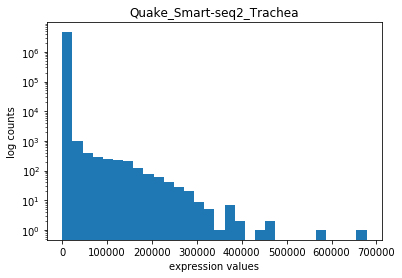

>>>>dataset Quake_Smart-seq2_Diaphragm


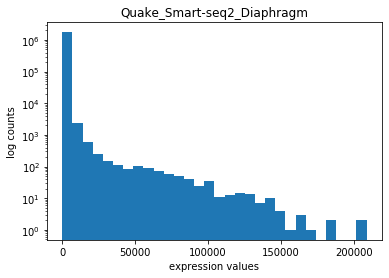

>>>>dataset Quake_10x_Spleen


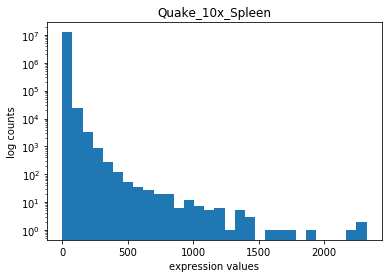

>>>>dataset Young


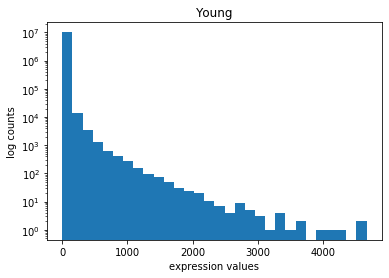

>>>>dataset mouse_ES_cell


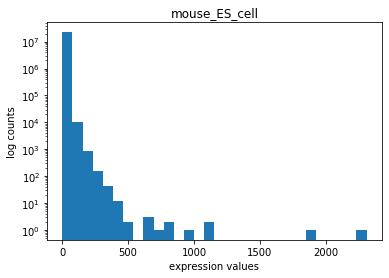

>>>>dataset Adam


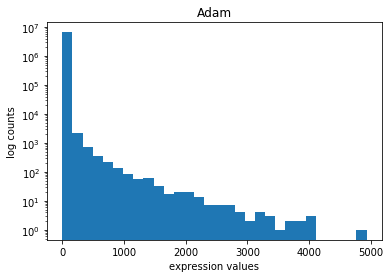

>>>>dataset Quake_10x_Bladder


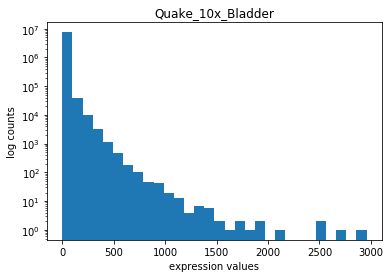

>>>>dataset Quake_Smart-seq2_Lung


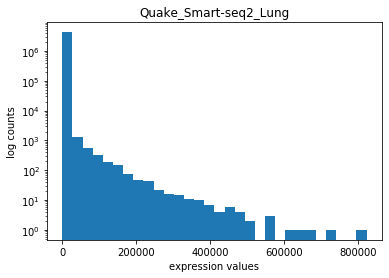

>>>>dataset Quake_10x_Limb_Muscle


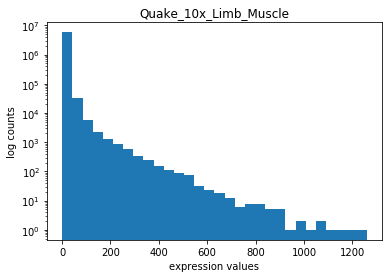

>>>>dataset worm_neuron_cell


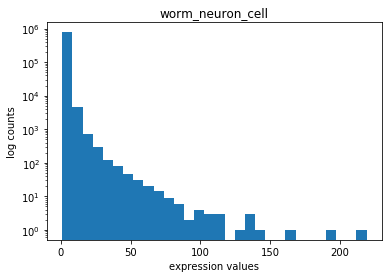

>>>>dataset mouse_bladder_cell


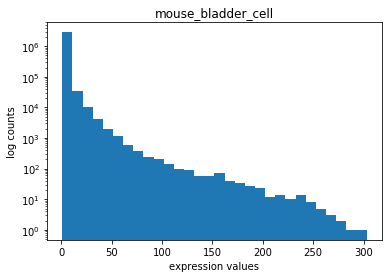

>>>>dataset Romanov


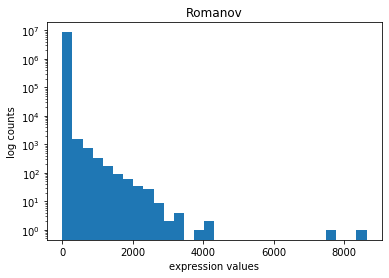

>>>>dataset Quake_Smart-seq2_Limb_Muscle


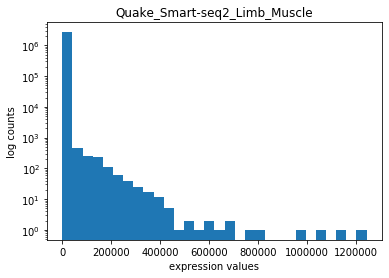

>>>>dataset Muraro


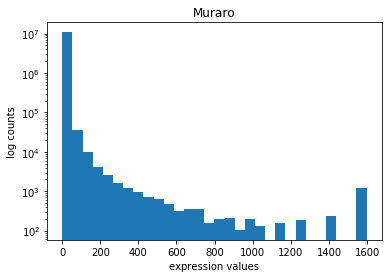

>>>>dataset 10X_PBMC


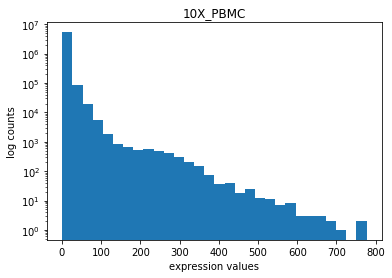

In [4]:
df = pd.DataFrame(columns=["dataset", "size", "nb_clusters",  
                          "sparsity", "max_value", "non_zero_mean","non_zero_median", "non_zero_skew", 
                           "non_zero_kurosis", "cluster_sizes",])

for dataset in tqdm(files):
    if category in ["balanced_data", "imbalanced_data"]:
        data_mat = h5py.File(f"{path}/R/simulated_data/{category}/{dataset}.h5","r")
    else:
        data_mat = h5py.File(f"{path}/real_data/{dataset}.h5","r")
        
    Y = np.array(data_mat['Y'])
    X = np.array(data_mat['X'])
    print(f">>>>dataset {dataset}")

    if category == "real_data" and X.shape[0] > 20000:
        continue
    n_clusters = np.unique(Y).shape[0]
    sparsity = len(np.where(X == 0)[0])/(X.shape[0] *X.shape[1])
    max_value = int(np.max(X))
    non_zero = X[np.where(X != 0)]
    non_zero_mean = np.mean(non_zero)
    non_zero_median= np.median(non_zero)
    non_zero_skew=skew(non_zero)
    non_zero_kurosis=kurtosis(non_zero)
    df.loc[df.shape[0]] = [
        dataset, f"{X.shape[0]} x {X.shape[1]}", n_clusters,
        
        sparsity, max_value, non_zero_mean, non_zero_median, non_zero_skew, non_zero_kurosis,
        list(zip(*Counter(Y).most_common()))[1]
    ]
    plt.figure()
    plt.hist(non_zero, bins = 30, log = True)
    plt.xlabel("expression values")
    plt.ylabel("log counts")
    plt.title(dataset)
    plt.show()

df.sort_values(by="nb_clusters").reset_index(
    drop=True).to_excel(f"../output/pickle_results/{category}/description.xlsx")

In [5]:
df

,dataset,size,nb_clusters,sparsity,max_value,non_zero_mean,non_zero_median,non_zero_skew,non_zero_kurosis,cluster_sizes
0,Quake_Smart-seq2_Trachea,1350 x 23341,4,0.854845,678254,219.230787,62.000000,68.069163,6353.746144,"(830, 206, 201, 113)"
1,Quake_Smart-seq2_Diaphragm,870 x 23341,5,0.913524,208892,249.012966,45.000000,45.805303,2849.203688,"(439, 241, 81, 78, 31)"
2,Quake_10x_Spleen,9552 x 23341,5,0.943383,2324,3.105816,1.000000,25.107513,2431.105956,"(6886, 1930, 464, 230, 42)"
3,Young,5685 x 33658,11,0.946964,4666,3.634876,1.000000,44.997025,4003.701746,"(1498, 1201, 731, 621, 483, 373, 268, 259, 118..."
4,mouse_ES_cell,2717 x 24175,4,0.657644,2309,2.420532,1.000000,25.479049,4949.197666,"(933, 798, 683, 303)"
5,Adam,3660 x 23797,8,0.923276,4929,2.660352,1.000000,89.256508,12820.443617,"(629, 617, 516, 513, 463, 396, 302, 224)"
6,Quake_10x_Bladder,2500 x 23341,4,0.869397,2959,4.684555,1.000000,17.176711,686.447059,"(1203, 1167, 73, 57)"
7,Quake_Smart-seq2_Lung,1676 x 23341,11,0.890813,822470,319.707172,65.000000,81.872905,10691.379244,"(693, 423, 113, 90, 85, 65, 57, 53, 37, 35, 25)"
8,Quake_10x_Limb_Muscle,3909 x 23341,6,0.935695,1259,3.228640,1.000000,22.777295,991.899380,"(1330, 1136, 461, 354, 320, 308)"
9,worm_neuron_cell,4186 x 13488,10,0.986181,219,1.763804,1.000000,18.338445,970.708218,"(1015, 842, 443, 400, 334, 314, 305, 239, 224,..."


In [7]:
df.cluster_sizes.values[-5]

(717, 357, 344, 316, 236, 224, 131, 80, 75, 64, 44, 41, 38, 36, 30, 13)